[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/vmetsis/cads-cv/blob/main/2.4-image_gradients.ipynb)

# Image Gradients

In this notebook we will see how to compute the gradients of an image. The gradient of an image is a vector field that represents the intensity change of the image. The gradient is a fundamental concept in image processing and computer vision, as it is used in many algorithms, such as edge detection, image segmentation, and object detection.

## Download the Data

In [1]:
# If running on Google Colab, download the data first.

import os
import sys

def download_files(base_url, files, local_dir):
    if not os.path.exists(local_dir):
        os.makedirs(local_dir)
    for file in files:
        file_url = base_url + file
        os.system(f"wget -q {file_url} -P {local_dir}")

def download_data():
    base_url = "https://raw.githubusercontent.com/vmetsis/cads-cv/main/data/"
    data_files = ["gradient.jpg", "church.jpg", "copyright.png"]
    
    download_files(base_url, data_files, 'data')

if 'google.colab' in sys.modules:
    download_data()

## Gradients

A gradient is a measure of the change in the intensity of an image. For color images it is the change in the intensity of each color channel. For grayscale images it is the change in the intensity of each pixel. For example, the following grayscale image has an intensity increase from left to right. An increase in intensity forms a positive gradient.

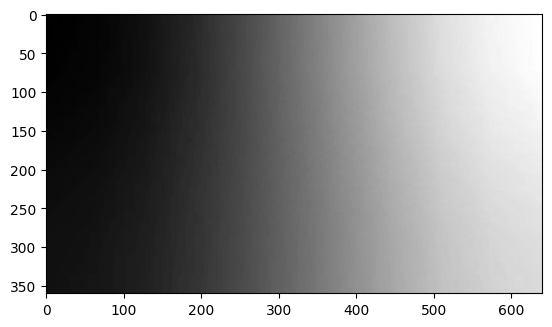

In [2]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('data/gradient.jpg')
gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)

# Show image
plt.imshow(gray, cmap='gray')
plt.show()

When the change in intensity is sudden, we as humans perceive it as discontinuity or as an "edge". Let's load an image in both color and gray scale and see how the color and intensity looks along a specified line. We will use the function `profile_line` fromt he library *skimage* to extract the intensity along a specified line.


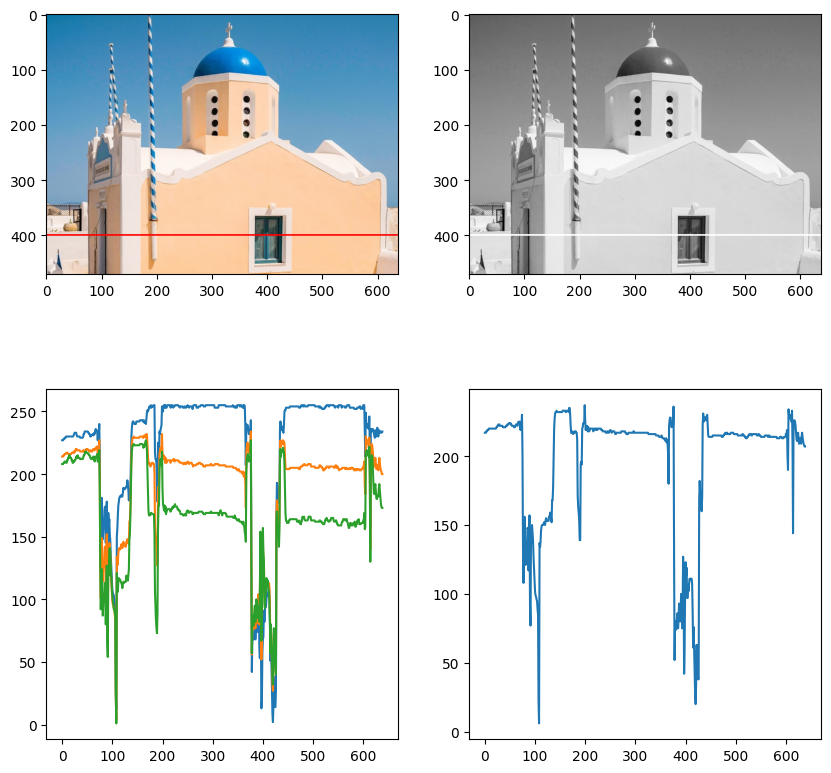

In [3]:
from skimage.measure import profile_line        # Library function for extracting the color profile of an image along a line

img = cv.imread('data/church.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)        # Convert from BGR to RGB color scheme
gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)      # Convert to grayscale

# Extract profile line at raw 400
(x1, y1) = (col1, row1) = (0, 400)              # Start point
(x2, y2) = (col2, row2) = (img.shape[1], 400)   # End point

color_profile = profile_line(img, (row1, col1), (row2, col2))
intensity_profile = profile_line(gray, (row1, col1), (row2, col2))

# Draw a line at raw 400
cv.line(img, (x1, y1), (x2, y2), (255, 0, 0), 2)
cv.line(gray, (x1, y1), (x2, y2), (255, 255, 255), 2)

plt.figure(figsize=(10, 10))
plt.subplot(221)
plt.imshow(img)
plt.subplot(222)
plt.imshow(gray, cmap='gray')
plt.subplot(223)
plt.plot(color_profile)
plt.subplot(224)
plt.plot(intensity_profile)
plt.show()



As we can see, in bright areas the intensity is high and in dark areas it is low. When there is a sudden change in intensity we see a sudden dip or increase in the intensity curve. If we define the intensity along the line as a function $f(x)$, where $x$ is the position along the line, then the gradient is defined as $f'(x) = df/dx$, i.e. as the first derivative of the intensity function.

Let's observe what happens to the intensity and gradient of the intensity on a more simple image at row=200.

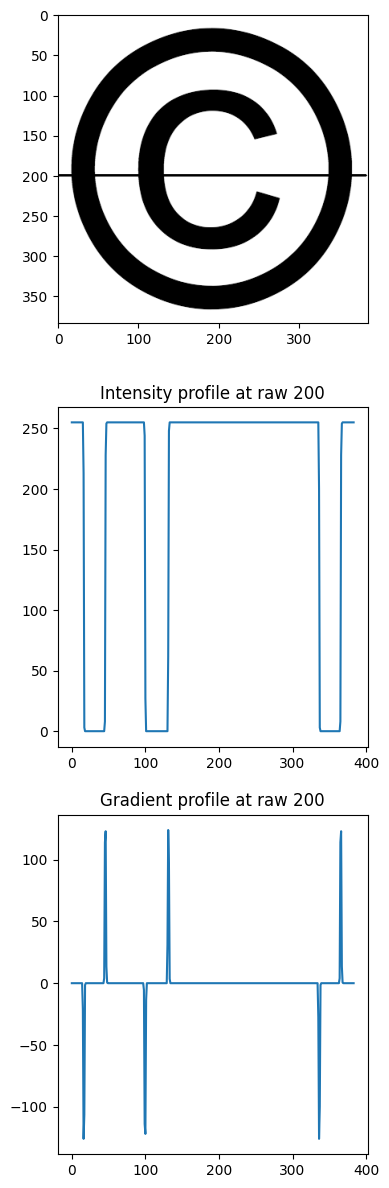

In [4]:
img = cv.imread('data/copyright.png', cv.IMREAD_GRAYSCALE)

intensity200 = profile_line(img, (200, 0), (200, 383))
grad200 = np.gradient(intensity200)

cv.line(img, (0, 200), (383, 200), (0, 0, 0), 2)

# Show the image, intesity profile and gradient profile
plt.figure(figsize=(4, 15))
plt.subplot(311)
plt.imshow(img, cmap='gray')
plt.subplot(312)
plt.plot(intensity200), plt.title('Intensity profile at raw 200')
plt.subplot(313)
plt.plot(grad200), plt.title('Gradient profile at raw 200')
plt.show()

We can observe that when there is an increase in intensity, the gradient (first derivative of the intensity function) is positive and when there is a decrease in intensity, the gradient is negative.

## Sobel derivatives

The gradient above was calculated along a horizontal line, one pixel thick. If we want to calculate the gradient along all horizontal lines of the image, we repeat the above process for each row of the image, or we can apply a filter that can achieve this effect. One such filter is known as the **Sobel** filter or operator.The Sobel filter is a discrete approximation of the first derivative of the Gaussian filter. The Sobel filter is directional, i.e. it only calculates the gradient along a single direction, eg. along the x-axis (horizontal) or y-axis (vertical).

$$ 
sobelFilterHorizontal = S_x = \begin{bmatrix} 
-1 & 0 & +1  \\
-2 & 0 & +2 \\
-1 & 0 & +1 
\end{bmatrix} 
$$

$$
sobelFilterVertical = S_y = \begin{bmatrix}
-1 & -2 & -1 \\
0 & 0 & 0 \\
+1 & +2 & +1
\end{bmatrix}
$$

In OpenCV, the Sobel filter is implemented as the function `cv.Sobel`. The Sobel filter is a directional filter, so we can specify the direction of the gradient. Let's apply the sobel filter in x and y direction to the copyright image from the previous example.

The parameters of the Sobel filter are:
- img: The image to be filtered.
- ddepth: The depth of the output image. It can be CV_8U, CV_16S, CV_32F, or CV_64F. The input image is a 8-bit/pixel grayscale image or CV_8U. However, we set the output to be of a floating point type. Otherwise, negative gradients will be clipped to 0
- dx: The x-derivative order. It can be 0, 1, or 2.
- dy: The y-derivative order. It can be 0, 1, or 2.
- ksize: The kernel size. It must be odd and the size must be greater than 1.

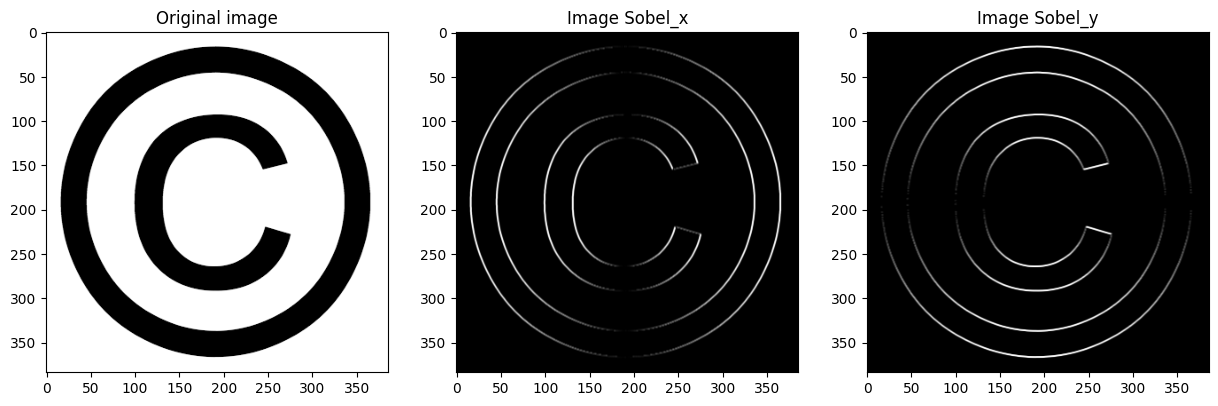

In [5]:
img = cv.imread('data/copyright.png', cv.IMREAD_GRAYSCALE)

img_sobel_x = cv.Sobel(img, cv.CV_64F, dx=1, dy=0, ksize=3)
img_sobel_y = cv.Sobel(img, cv.CV_64F, dx=0, dy=1, ksize=3)

# Show sobelx and sobely
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.imshow(img, cmap='gray'), plt.title('Original image')
plt.subplot(132)
plt.imshow(np.abs(img_sobel_x), cmap='gray'), plt.title('Image Sobel_x')
plt.subplot(133)
plt.imshow(np.abs(img_sobel_y), cmap='gray'), plt.title('Image Sobel_y')
plt.show()


We notice that on the x direction the `sobel_x` filter produces a large absolute value for the gradient where the intensity changes abruptly along the x-axis. On the y direction the `sobel_y` filter produces a large absolute value for the gradient where the intensity changes abruptly along the y-axis. 

To get the gradient in all directions, we sum the absolute value of the x and y gradients, or we can take the euclidean norm (aka L2-norm) of the gradient defined as $\sqrt{g_x^2 + g_y^2}$.

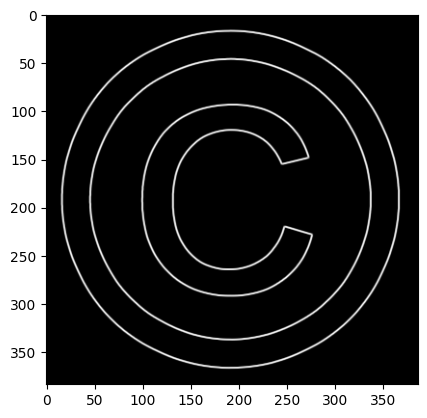

In [6]:
# L2-norm of the gradient
grad = np.sqrt(img_sobel_x**2 + img_sobel_y**2)

# Show grad
plt.imshow(grad, cmap='gray')
plt.show()

Let's apply the same process to the church image from the example above.

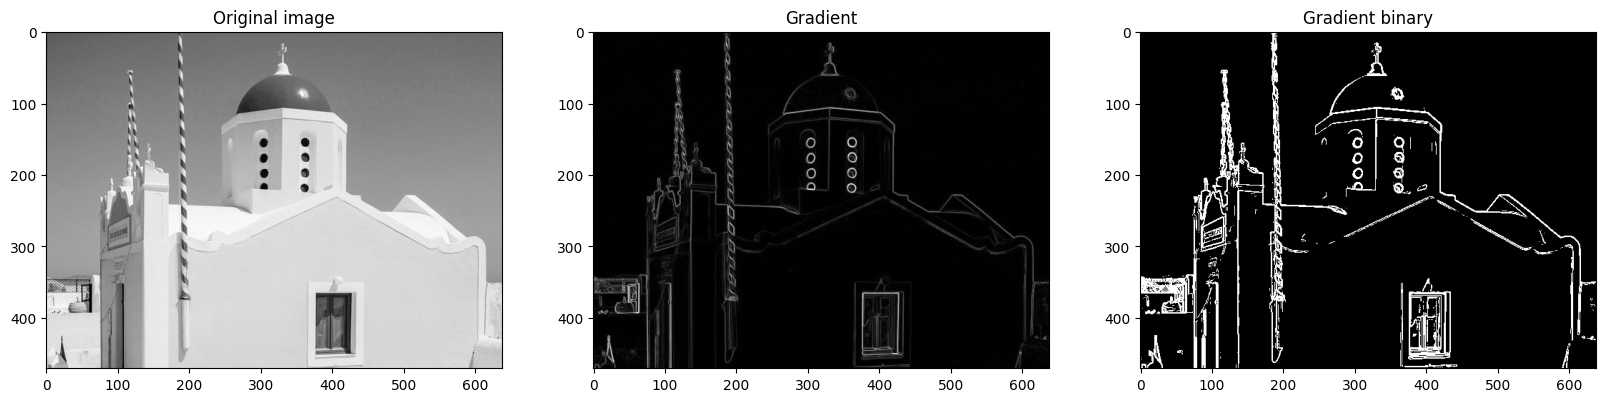

In [7]:
img = cv.imread('data/church.jpg', cv.IMREAD_GRAYSCALE)

img_sobel_x = cv.Sobel(img, cv.CV_64F, dx=1, dy=0, ksize=3)
img_sobel_y = cv.Sobel(img, cv.CV_64F, dx=0, dy=1, ksize=3)
grad = np.sqrt(img_sobel_x**2 + img_sobel_y**2)

thresh, binary_grad = cv.threshold(grad, thresh = 100, maxval = 255, type = cv.THRESH_BINARY)

# Show sobelx and sobely
plt.figure(figsize=(20, 10))
plt.subplot(131)
plt.imshow(img, cmap='gray'), plt.title('Original image')
plt.subplot(132)
plt.imshow(grad, cmap='gray'), plt.title('Gradient')
plt.subplot(133)
plt.imshow(binary_grad, cmap='gray'), plt.title('Gradient binary')
plt.show()

We can also calculate the orientation of of the gradient of each pixel. The orientation is defined as the angle between the x-axis and the gradient vector. The orientation is calculated as $\arctan(g_y/g_x)$. The orientation is a continuous value between $-\pi$ and $\pi$. We can convert the radians to degrees by multiplying by $180/\pi$, or by using the numpy function `np.rad2deg`.

We can use the orientation to calculate the gradient in all directions. Let's calculate the orientation of the gradient of the church image.

In [8]:
import math 

gradient_orientation_rad = np.arctan2(img_sobel_y, img_sobel_x)
gradient_orientation_deg = gradient_orientation_rad * 180 / math.pi # Convert to degrees. Same as: np.rad2deg(gradient_orientation_rad)


# Show gradient orientation at a specific point
print('Gradient orientation at (200, 200) in radians:', gradient_orientation_rad[200, 200])
print('Gradient orientation at (200, 200) in degrees:', gradient_orientation_deg[200, 200])


Gradient orientation at (200, 200) in radians: 1.0636978224025597
Gradient orientation at (200, 200) in degrees: 60.94539590092286


We can see the distribution of the gradient orientations in the image by plotting a histogram of the orientations. Let's plot the histogram of the orientations of the gradient of the church image.

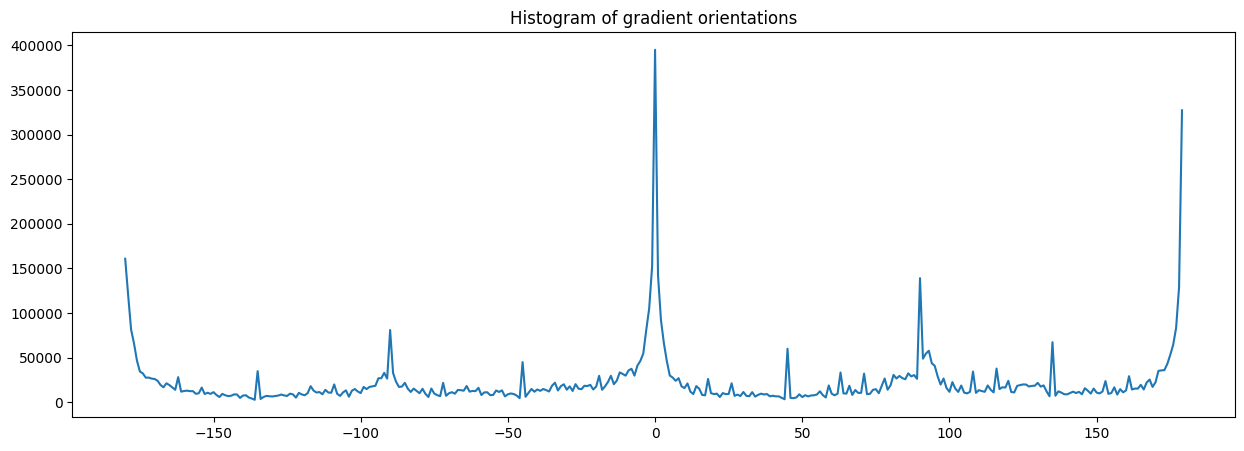

In [9]:
# Get the histogram of the gradient orientations
# See https://numpy.org/doc/stable/reference/generated/numpy.histogram.html for documentation
hist, bins = np.histogram(gradient_orientation_deg, bins=360, range=(-180, 180), weights=grad)

# Show the histogram
plt.figure(figsize=(15, 5))
plt.plot(bins[:-1], hist)
plt.title('Histogram of gradient orientations')
plt.show()

Note that the gradient orientations are given in the range $-\pi$ to $\pi$, or $-180$ to $180$ degrees. We can convert the orientation to the range $0$ to $2\pi$ by adding $\pi$ to the orientation. We can also convert the orientation to the range $0$ to $360$ degrees by multiplying the orientation by $180/\pi$.

In [10]:
# Convert gradient orientations to the range [0, 360]
gradient_orientation_deg = gradient_orientation_rad + math.pi # Convert to [0, 2*pi]
gradient_orientation_deg = gradient_orientation_deg * 180 / math.pi # Convert to degrees 

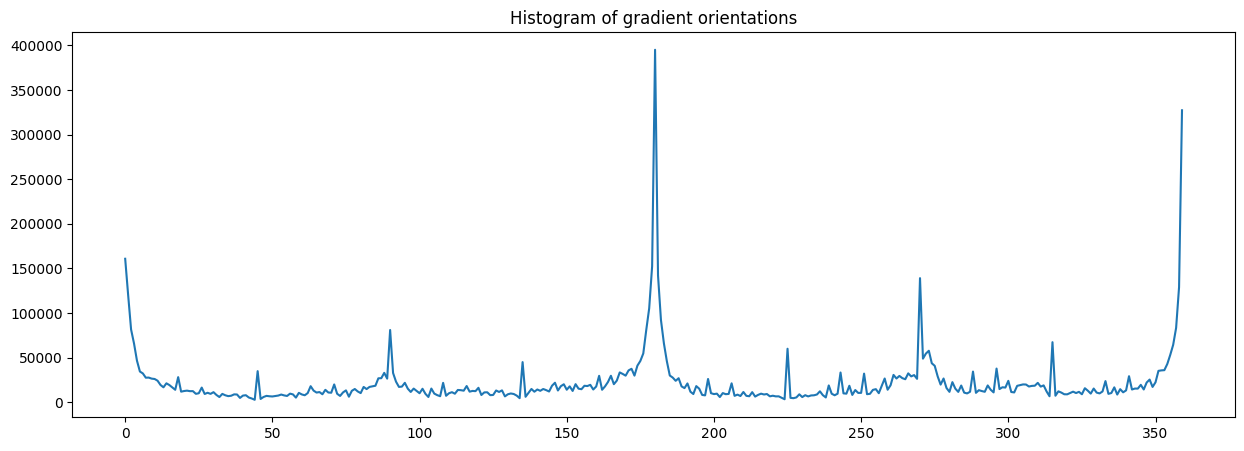

In [11]:
# Get the histogram of the gradient orientations
# See https://numpy.org/doc/stable/reference/generated/numpy.histogram.html for documentation
hist, bins = np.histogram(gradient_orientation_deg, bins=360, range=(0, 360), weights=grad)

# Show the histogram
plt.figure(figsize=(15, 5))
plt.plot(bins[:-1], hist)
plt.title('Histogram of gradient orientations')
plt.show()

We notice that the highest values in the histogram are at the orientations of $0$, $180$, and $360$ degrees. That means the orientation vector is most often pointing in the horizontal direction, either to the left or to the right. Since the gradient orientation vector at each pixel is perpendicular to the edge, we can say that most edges in this image are vertical.